# Linear Regression Exercise

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Get data

- Get the data from the following link:
    - https://archive.ics.uci.edu/ml/datasets/Auto+MPG
    - Look for "auto-mpg.data-original"
- Read the dataset into pandas
    - Try to figure out how to do it without using an external editor like excel
    - Set the column names
    - Hint: find the right seperator/delimiter

In [3]:
col_names = 'mpg cylinders displacement horsepower weight acceleration model_year origin car_name'.split()

col_names

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin',
 'car_name']

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original',
                 header=None,
                 names=col_names,
                 delim_whitespace=True
#                  sep='\s+'
                )

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


## Cleaning data
- Which columns have missing values? How many?
- Drop rows with missing "mpg"
    - Hint: Use dropna
- Impute the missing values of "horsepower" with the mean of "horsepower"

In [6]:
df.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [7]:
df = df.dropna(subset=['mpg'])

In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [9]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

## Exploring the data

- What are the data types of each column?
- What is the mean, median, and standard deviation of each column?
- What does the distribution for each feature look like?
- Which features are correlated?

In [11]:
df.shape

(398, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    float64
 7   origin        398 non-null    float64
 8   car_name      398 non-null    object 
dtypes: float64(8), object(1)
memory usage: 31.1+ KB


In [13]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


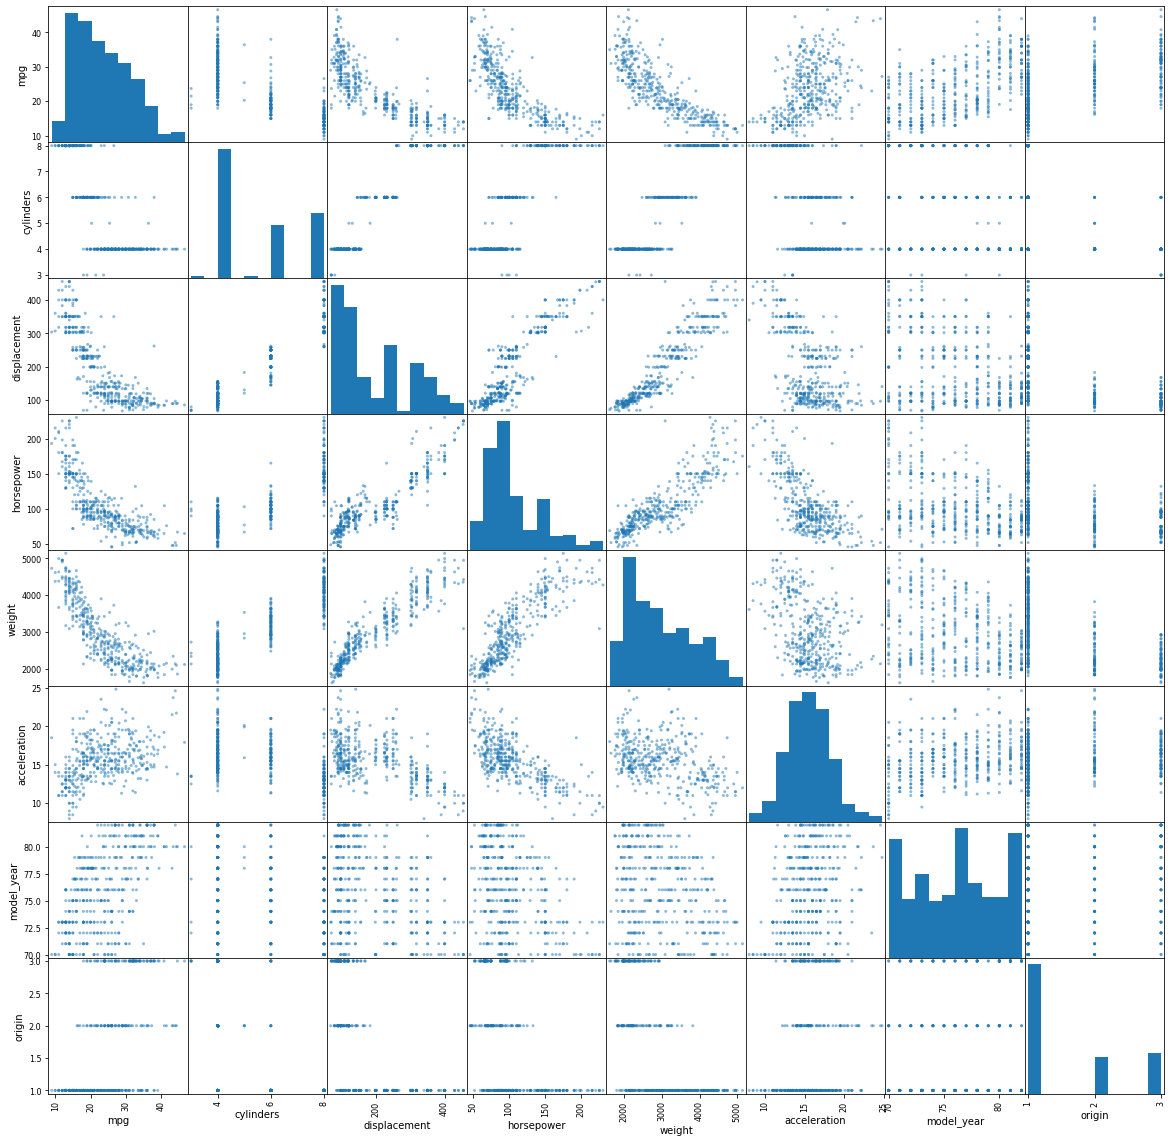

In [14]:
pd.plotting.scatter_matrix(df, figsize=(20,20));

In [15]:
df.corr()

ValueError: could not convert string to float: 'chevrolet chevelle malibu'

In [ ]:
# Multicolinearity

## Machine Learning

- Split the data into a train, test with a ratio of 67:33 and random_state 42
- Train a Linear Regression model
- Get the mean squared error and r2 score
- Try scaling the data and analyzing the coefficients
- How can we improve our model?
    - Try using a different algorithm (ex. DecisionTreeRegressor)
    - Try tuning the hyperparameters
    - Try engineering new features (feature engineering)
    - Try removing some features (feature selection)

In [16]:
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

/Users/ZXu/Library/Python/3.8/lib/python/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
# Baseline model

X = df.drop(columns=['mpg', 'car_name'])
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

r2: 0.8441279467563814
MSE: 8.971526176186126


In [19]:
model.coef_.mean()

-0.06809273764166283

In [23]:
# pd.Series(model.coef_, X.columns).sort_values().plot('bar');
pd.Series(model.coef_, X.columns).sort_values()

weight         -5.386055
horsepower     -0.107583
cylinders       0.065603
acceleration    0.355856
displacement    0.646050
origin          1.180228
model_year      2.769252
dtype: float64

In [ ]:
model.coef_.mean()

-0.16879309662698547

In [ ]:
model.coef_

array([ 0.06560313,  0.64604985, -0.10758315, -5.38605472,  0.35585568,
        2.76925217,  1.18022788])

In [ ]:
model.coef_

array([-0.        , -0.08088695, -0.04904617, -4.48185756,  0.        ,
        2.03521501,  0.45138852])

In [26]:
from sklearn.linear_model import Lasso, Ridge

X = df.drop(columns=['mpg', 'car_name'])
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Lasso(alpha=1)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

r2: 0.8374690063901806
MSE: 9.354794738817178


In [27]:
# Feature engineering
dff = df.copy()

# df['power_to_weight'] = df['horsepower'] / df['weight']
dff['hp-per-cylinder'] = dff['horsepower'] / dff['cylinders']
dff['hp-per-pound'] = dff['horsepower'] / dff['weight']
dff['displacement-per-pound'] = dff['displacement'] / dff['weight']
dff['displacement-per-cylinder'] = dff['displacement'] / dff['cylinders']
dff['hp-times-weight'] = dff['horsepower'] * dff['weight']
dff['displacement-times-hp'] = dff['displacement'] * dff['horsepower']
dff['hp_log'] = np.log(dff['horsepower'])

In [35]:
X = dff.drop(columns=['mpg', 'car_name'])
y = dff['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Lasso(alpha=0.03)
# model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

r2: 0.8908310752187654
MSE: 6.283434688386238


In [36]:
model.coef_

array([-1.56045359, -0.        , -0.        , -0.        , -0.41994267,
        2.90037401,  0.5800489 , -1.62923274,  3.24618647, -1.90585286,
       -0.        ,  0.        ,  2.55922204, -5.6497073 ])

<Axes: >

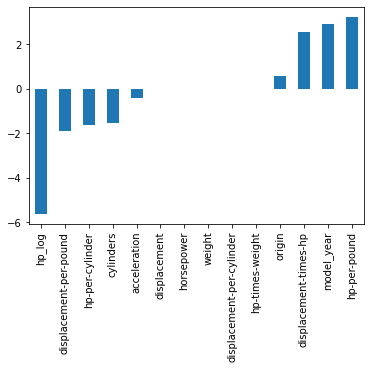

In [38]:
pd.Series(model.coef_, X.columns).sort_values().plot(kind='bar')

In [39]:
from sklearn.tree import DecisionTreeRegressor

X = dff.drop(columns=['mpg', 'car_name'])
y = dff['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeRegressor(max_depth=20)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

r2: 0.7745896815906868
MSE: 12.973939393939393


<Axes: >

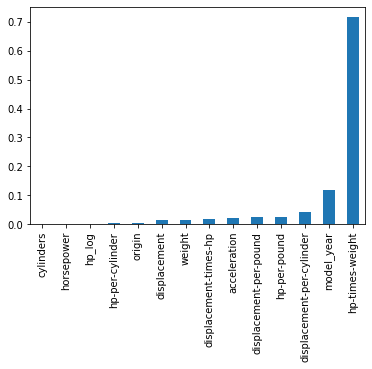

In [40]:
pd.Series(model.feature_importances_, X.columns).sort_values().plot(kind='bar')